# La data visualisation avec Python

In [4]:
import numpy as np
import pandas as pd

De nombreux packages sont disponibles en Python pour représenter des données
de manière attractive.

Le plus connu est Matplotlib et sert de base à de nombreux autres packages.

## Construction de graphiques avec matplotlib

### Afficher des graphiques

Matplotlib est un package complet pour la data visualisation. Il est basé sur la
construction de graphiques en utilisant des commandes simples.

On commence par importer le module pyplot du package :

In [5]:
import matplotlib.pyplot as plt

Si vous travaillez dans un notebook Jupyter, il vous faudra ajouter une ligne au
début de votre notebook afin de faire en sorte que le graphique apparaisse dans le
notebook à la suite de votre code sous la forme d’une image statique :

In [6]:
%matplotlib inline

Le principe du développement de graphiques avec Matplotlib est toujours le
même : on peuple notre graphique petit à petit et, une fois le graphique terminé, on soumet le code et on affiche le graphique (avec plt.show() dans votre IDE classique ou en soumettant la cellule dans votre notebook). 

Par ailleurs, il existe deux manières de construire des graphiques avec Matplotlib.

On peut enchaîner les traitements et finalement afficher un graphique :

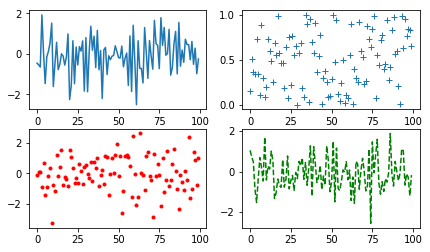

In [24]:
# on crée une figure
plt.figure(figsize=(7,4))
# on commence par un sous-graphique
plt.subplot(2,2,1)
plt.plot(np.random.randn(100))
# on enchaine avec un second sous-graphique
plt.subplot(2,2,2)
plt.plot(np.random.random(size=100),"+")
# on ajoute un troisième sous-graphique
plt.subplot(2,2,3)
plt.plot(np.random.randn(100),"r.")
# on finit avec le dernier sous-graphique
plt.subplot(2,2,4)
plt.plot(np.random.randn(100), "g--")
#plt.show() #si dans un IDE classique

On peut utiliser des objets et travailler dessus :

```python
# on crée une figure avec 4 sous-graphiques
fig, ax=plt.subplots(2,2)
# on construit les 4 graphiques
ax[0,0].plot(np.random.randn(100))
ax[0,1].plot(np.random.random(size=100),"+")
ax[1,0].plot(np.random.randn(100),"r.")
ax[1,1].plot(np.random.randn(100), "g--")
# on sauvegarde l'image dans un fichier
plt.savefig("./data/mes_graphiques2.jpg")
#plt.show() #si dans un IDE classique
```

Nous aurons tendance à privilégier la première approche qui est bien adaptée aux
notebooks mais nous serons amenés à utiliser parfois la seconde notamment dans
le cadre de graphiques plus interactifs.

### Définir son premier graphique

Si on désire dessiner un graphique simple, on pourra utiliser la fonction `plot()` :

- On a différentes fonctions pour modifier le graphique :
    - `plt.title()`, `plt.xlabel()`, `plt.ylabel()`, `plt.axis`


- En enchainant les `plt.plot()`, on peut avoir plusieurs courbes par graphique

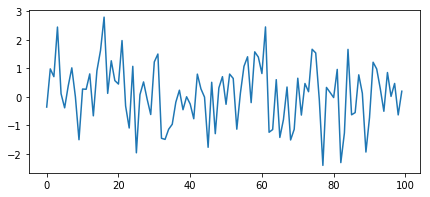

In [28]:
plt.figure(figsize=(7,3))
plt.plot(np.random.randn(100))

On peut simplement ajouter des graphiques et des caractéristique à notre figure :

Text(0,0.5,'Valeur')

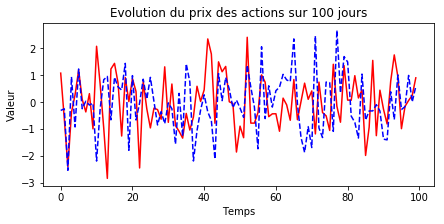

In [27]:
plt.figure(figsize=(7,3))
# on génère un premier graphique (rouge avec une ligne continue entre les points)
plt.plot(np.random.randn(100),'r-' )
# on génère un second graphique (bleu avec une ligne pointillée entre les points)
plt.plot(np.random.randn(100),'b--' )
# on ajoute des infos sur le titre, les noms des axes
plt.title("Evolution du prix des actions sur 100 jours")
plt.xlabel("Temps")
plt.ylabel("Valeur")

### Nuage de points avec plt.scatter

On peut utiliser la fonction `plt.scatter()` pour dessiner un nuage de points.

In [11]:
# on génère des données
x=np.random.random(size=100)
y=np.random.random(size=100)
taille = np.random.random(size=100)*100
couleurs=np.random.random(size=100)*100

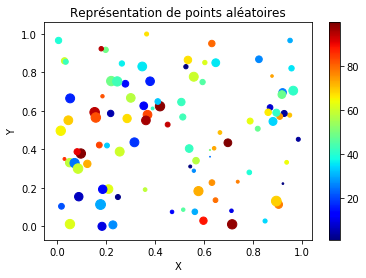

In [12]:
# s représente la taille des points
# c représente les couleurs (on peut avoir une seule couleur)
# cmap permet de fournir à Matplotlib une palette de couleurs
plt.scatter(x,y,s=taille, c=couleurs, cmap=plt.get_cmap("jet"))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Représentation de points aléatoires")
plt.colorbar()

**Exercice :**
    
Utilisez les données AirBnB pour représenter les coordonnées géographiques sous forme de nuage de points

In [13]:
# on commence par récupérer les données
#listing=pd.read_csv("./data/airbnb.csv",index_col=0)

### Le graphique en bâtons avec plt.bar()
Voici un premier exemple de graphique en bâtons :

<BarContainer object of 5 artists>

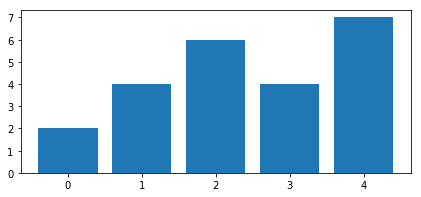

In [31]:
plt.figure(figsize=(7,3))
plt.bar(range(5),[2,4,6,4,7])

Text(0.5,1,'Nombre moyen de critiques')

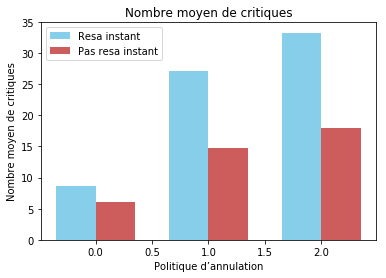

In [36]:
# on construit les groupes grâce aux données AirBnB
review_means_resa=listing[listing["instant_bookable"]=="t"]\
.groupby("cancellation_policy").number_of_reviews.mean()

review_means_noresa=listing[listing["instant_bookable"]=="f"]\
.groupby("cancellation_policy").number_of_reviews.mean()

# on récupère le nombre de 
ind = np.arange(len(review_means_resa[:3]))

width = 0.35
plt.bar(ind - width/2, review_means_resa[:3], width, color='SkyBlue', label='Resa instant')
plt.bar(ind + width/2, review_means_noresa[:3], width, color = 'IndianRed', label = 'Pas resa instant')
plt.ylabel('Nombre moyen de critiques')
plt.xlabel("Politique d’annulation")
plt.legend()
plt.title("Nombre moyen de critiques")

Ce code est séparé en plusieurs parties :

- Dans une première partie, nous manipulons notre DataFrame pour en extraire les informations qui nous intéressent. Dans notre cas, il s’agit de deux objets Series qui rassemblent les nombres moyens de critiques des appartements en fonction de la possibilité de réserver instantanément le logement et en ajoutant un groupby pour calculer la moyenne en fonction des politiques d’annulation (nous ne prenons que les trois premières, ce qui se traduit par [:3]).
- Dans une seconde partie, nous définissons les caractéristiques de notre graphique, la largeur des barres et leur position avec une suite d’entiers. On peut alors dessiner les barres en utilisant plt.bar(). Nous les positionnons de chaque côté de la marque numérique définie plus haut.
- Dans une troisième partie, nous modifions les ticks en utilisant les différentes politiques d’annulation et ajoutons une légende.

### La construction d’histogrammes

Les histogrammes sont des outils de description des données extrêmement importants afin d’aider à déterminer la distribution sous-jacente à chaque variable quantitative.

Si nous désirons créer deux histogrammes associés à deux variables ayant les mêmes échelles sur le même graphique, nous utilisons le code suivant :

In [16]:
# on génère les données
data1=np.random.randn(100000)+1
data2=np.random.randn(100000)

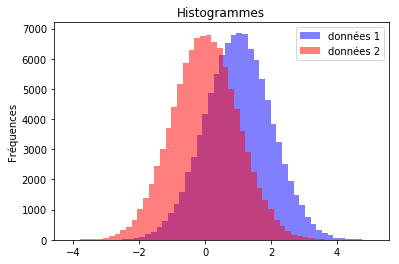

In [17]:
# 1er histogramme
plt.hist(data1, bins=50, color="blue", label="données 1", alpha=0.5)
# 2nd histogramme
plt.hist(data2, bins=50, color="red", label="données 2", alpha = 0.5)
plt.title("Histogrammes")
plt.ylabel("Fréquences")
plt.legend()

Dans ce code, on utilise *label=* pour donner un nom aux données. 

Le *alpha=* est utilisé afin d’afficher les graphiques en transparence et gère le degré d’opacité des graphiques.

**Exercice :**
    
Construre un histogramme des prix des logements à Paris

## Seaborn pour des représentations plus élaborées
### Utilisation de Seaborn

Seaborn est un autre package intéressant pour la création de graphiques. Il est
basé sur Matplotlib et en utilise les principes. Son principal intérêt réside dans la création de graphiques plus spécifiques en quelques lignes de code.

In [18]:
import seaborn as sns

### Le box-plot ou la boîte à moustaches

Un box plot (appelé aussi une boîte à moustache) est un graphique utilisé fréquemment pour l’exploration des données. Il permet de visualiser pour une variable ou pour un groupe d’individus le comportement global des individus.

Nous utiliserons ici des données de la région Île-de-France sur les communes de
la (données open data Île-de-France, voir le début du chapitre 4 pour une description des données). 

On représente le box-plot du nombre de naissances par commune en fonction du département d’Île-de-France :

Text(0.5,1,'Box plot du nombre de naissances par habitant par département')

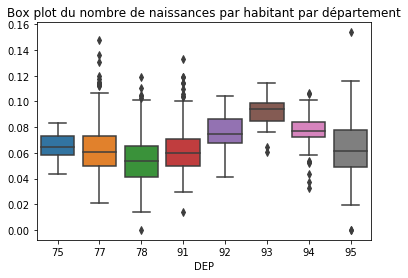

In [19]:
# on récupère les données
data_idf=pd.read_csv("./data/base-dpt.csv",sep=";")

sns.boxplot(data_idf["DEP"], data_idf["NAIS0914"]/ data_idf["P09_POP"])
plt.title("Box plot du nombre de naissances par habitant par département")

### Violin plot

Les violons ou violin plot sont des graphiques importants en visualisation de
données, ils permettent de visualiser la répartition des données et la boîte à moustache associée.

Pour obtenir un graphique en violons, on utilise :

Text(0.5,1,'Violin-plot par département')

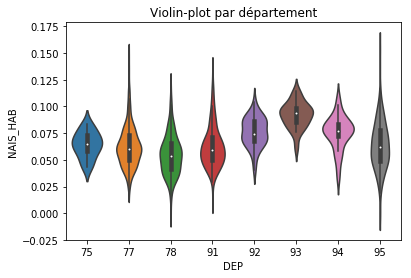

In [46]:
sns.violinplot("DEP","NAIS_HAB", data=data_idf)
plt.title("Violin-plot par département")

### Les pairplot() de Seaborn ou la matrice de graphiques

Le pairplot de Seaborn est un outil très efficace pour représenter les variables
quantitatives d’un DataFrame (à condition de ne pas trop en avoir).

Un pairplot va construire une figure avec à l’intérieur une matrice de graphiques.

Les éléments sur la diagonale sont des distplot et les éléments hors de la diagonale sont des nuages de points qui croisent les variables deux à deux.

Si nous essayons de représenter ce graphique par département sur les données
de la région Ile-de-France :

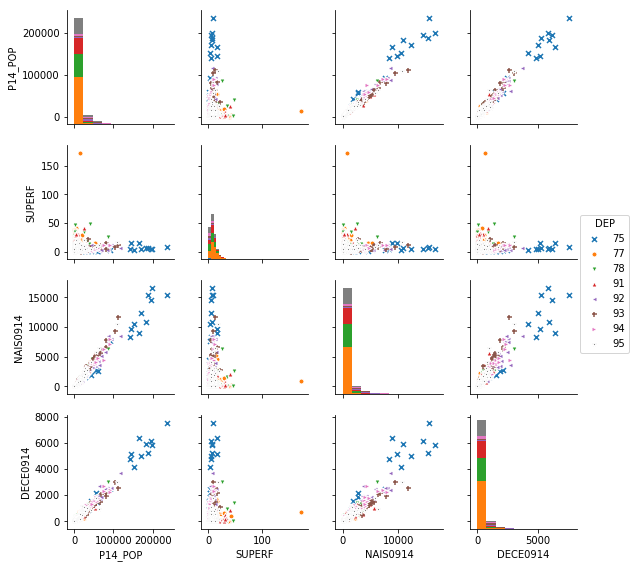

In [50]:
sns.pairplot(data=data_idf, hue='DEP',
             vars=['P14_POP', 'SUPERF','NAIS0914', 'DECE0914'],size=2, 
             plot_kws={"s": 25},markers=['x','o','v','^','<','+','>',"*"])


Il existe bien d'autres fonctionnalités de Matplotlib et Seaborn, n'hésitez pas à consulter la documentation des ces packages :
- https://matplotlib.org/ 
- https://seaborn.pydata.org/